<a href="https://colab.research.google.com/github/codewithpradeep14/Minor_course_projects_and_labs/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

100%|██████████| 170498071/170498071 [00:02<00:00, 81491312.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 1.979 accuracy: 26.72%
[Epoch 1, Batch 200] loss: 1.688 accuracy: 32.49%
[Epoch 1, Batch 300] loss: 1.543 accuracy: 36.37%
[Epoch 1, Batch 400] loss: 1.475 accuracy: 38.85%
[Epoch 1, Batch 500] loss: 1.384 accuracy: 41.06%
[Epoch 1, Batch 600] loss: 1.328 accuracy: 43.01%
[Epoch 1, Batch 700] loss: 1.306 accuracy: 44.40%
[Epoch 2, Batch 100] loss: 1.185 accuracy: 57.58%
[Epoch 2, Batch 200] loss: 1.161 accuracy: 58.15%
[Epoch 2, Batch 300] loss: 1.101 accuracy: 58.94%
[Epoch 2, Batch 400] loss: 1.069 accuracy: 59.58%
[Epoch 2, Batch 500] loss: 1.060 accuracy: 60.14%
[Epoch 2, Batch 600] loss: 1.008 accuracy: 60.80%
[Epoch 2, Batch 700] loss: 1.016 accuracy: 61.24%
[Epoch 3, Batch 100] loss: 0.939 accuracy: 66.69%
[Epoch 3, Batch 200] loss: 0.921 accuracy: 67.06%
[Epoch 3, Batch 300] loss: 0.921 accuracy: 67.29%
[Epoch 3, Batch 400] loss: 0.896 accuracy: 67.44%
[Epoch 3, B

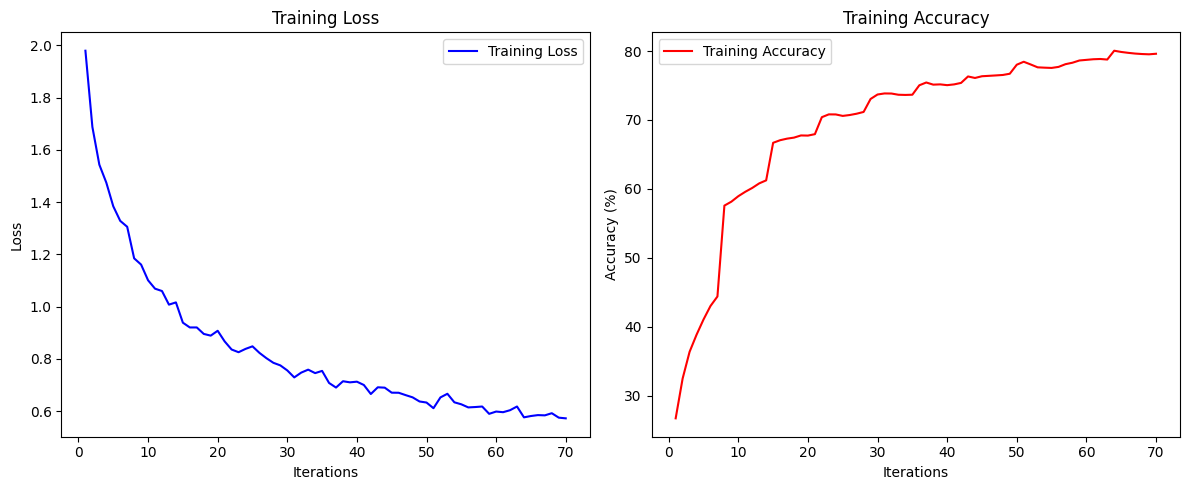

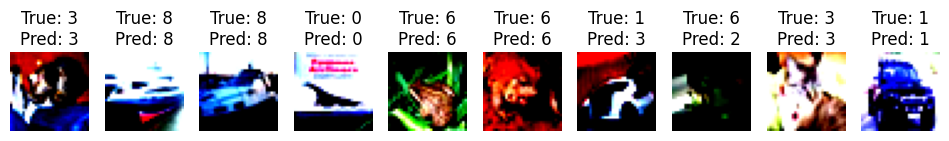

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for the training and test sets
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []

# Training loop with metric recording
for epoch in range(10):  # Number of epochs
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if i % 100 == 99:  # Print every 100 batches
            avg_loss = running_loss / 100
            accuracy = 100 * correct_train / total_train
            train_losses.append(avg_loss)
            train_accuracies.append(accuracy)
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {avg_loss:.3f} accuracy: {accuracy:.2f}%')
            running_loss = 0.0

print('Finished Training')

# Plot training loss and accuracy
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'r-', label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Collect predictions
def get_predictions(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_images.extend(images)
            all_labels.extend(labels)
            all_preds.extend(preds)

    return all_images, all_labels, all_preds

test_images, test_labels, test_preds = get_predictions(net, testloader)

# Convert to numpy arrays for visualization
test_images = torch.stack(test_images).cpu()
test_labels = torch.stack(test_labels).cpu()
test_preds = torch.stack(test_preds).cpu()

# Plot sample test images with predictions
def plot_images_with_predictions(images, labels, preds, n=10):
    """Plot a grid of images with their predicted and true labels."""
    plt.figure(figsize=(12, 12))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = images[i].numpy().transpose((1, 2, 0))  # Convert from Tensor to numpy array
        plt.imshow(img)
        plt.title(f'True: {labels[i].item()}\nPred: {preds[i].item()}')
        plt.axis('off')
    plt.show()

# Plot some test images
plot_images_with_predictions(test_images, test_labels, test_preds, n=10)
